In [1]:
#For Converting and Display 
import codecs
import numpy as np
import pandas as pd
from cnn import Net
import cv2
import pytesseract
from matplotlib import pyplot as plt

ModuleNotFoundError: No module named 'cnn'

In [100]:
#To fetch Details of Owner of Car
import requests
import xmltodict
import json

In [3]:
#For Loading our Empty CNN Model and Train it
import torch
import torch.nn as nn
import torchvision.transforms as transforms
import torchvision.datasets as datasets
from torch.autograd import Variable
torch.cuda.is_available()

False

In [41]:
#Read Files Path and Resizing Them
a = []
for i in range(1, 13):
  image = cv2.imread('/content/drive/MyDrive/cars_dataset/' + str(i) + '.png')
  filename = cv2.imread('/content/drive/MyDrive/cars_without_number_plate/' + str(i) + '.jpg')
  image.resize(3, 512, 512)
  filename.resize(3, 512, 512)
  a.append(image)
  a.append(filename)

In [42]:
#Our CNN Model
net = Net()
print(net)

Net(
  (conv1): Conv2d(3, 32, kernel_size=(5, 5), stride=(1, 1))
  (conv2): Conv2d(32, 64, kernel_size=(3, 3), stride=(1, 1))
  (conv3): Conv2d(64, 128, kernel_size=(3, 3), stride=(1, 1))
  (conv4): Conv2d(128, 256, kernel_size=(2, 2), stride=(1, 1))
  (pool): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  (fc1): Linear(in_features=230400, out_features=1000, bias=True)
  (fc2): Linear(in_features=1000, out_features=1000, bias=True)
  (fc3): Linear(in_features=1000, out_features=1, bias=True)
  (drop1): Dropout(p=0.1, inplace=False)
  (drop2): Dropout(p=0.2, inplace=False)
  (drop3): Dropout(p=0.3, inplace=False)
  (drop4): Dropout(p=0.4, inplace=False)
  (drop5): Dropout(p=0.5, inplace=False)
  (drop6): Dropout(p=0.6, inplace=False)
)


In [43]:
a = np.array(a)
a = torch.from_numpy(a)
a = a.type(torch.FloatTensor)

In [44]:
#Read a Label File For Training Purposes 
import pandas as pd
import numpy as np
from google.colab import files

df=pd.read_csv('label.csv')

key_pts = df.iloc[0:25, 0:1].values

In [45]:
key_pts = torch.from_numpy(key_pts)
key_pts = key_pts.type(torch.FloatTensor)

In [46]:
import torch.optim as optim
criterion = nn.MSELoss()
optimizer = optim.Adam(params = net.parameters(), lr = 0.001)

In [51]:
#Function To Train Our Model 
def train_net(n_epochs, a, key_pts):
    net.train()
    for epoch in range(n_epochs):
        running_loss = 0.0
        for i in range(1):
          output_pts = net(a[i].reshape(1, 3, 512, 512))
          loss = criterion(output_pts, key_pts[i])
          optimizer.zero_grad()
          loss.backward()
          optimizer.step()
          running_loss += loss.item()
          print('Epoch: {}, Batch: {}, Avg. Loss: {}'.format(epoch + 1, i+1, running_loss/10))
          running_loss = 0.0
    print('Finished Training')

In [52]:
train_net(1, a, key_pts)

Epoch: 1, Batch: 1, Avg. Loss: 0.10308351516723632
Finished Training


In [53]:
ab = cv2.imread('/content/drive/MyDrive/cars_dataset/1.png')
ab.resize(3, 512, 512)
ab = torch.from_numpy(ab)
ab = ab.type(torch.FloatTensor)

In [55]:
ab1=net(ab.reshape(1, 3, 512, 512))

In [63]:
##Detect Number Plate Fucntion 
def carplate_detect(image):
    carplate_overlay = image.copy() 
    carplate_rects = carplate_haar_cascade.detectMultiScale(carplate_overlay,scaleFactor=1.1, minNeighbors=3)
    for x,y,w,h in carplate_rects: 
        cv2.rectangle(carplate_overlay, (x,y), (x+w,y+h), (255,0,0), 5) 

    return carplate_overlay

In [62]:
# Function Adjusted to extract specific region of interest i.e. car license plate
def carplate_extract(image):

    carplate_rects = carplate_haar_cascade.detectMultiScale(image,scaleFactor=1.1, minNeighbors=5)
    for x,y,w,h in carplate_rects: 
        carplate_img = image[y+15:y+h-10 ,x+15:x+w-20] 

    return carplate_img

In [64]:
# Fucntion To Enlarge Image
def enlarge_img(image, scale_percent):
    width = int(image.shape[1] * scale_percent / 100)
    height = int(image.shape[0] * scale_percent / 100)
    dim = (width, height)
    resized_image = cv2.resize(image, dim, interpolation = cv2.INTER_AREA)
    return resized_image

In [3]:
# API function to fetch Details 
def get_vehicle_info(plate_number):
    r = requests.get("http://www.regcheck.org.uk/api/reg.asmx/CheckIndia?RegistrationNumber={0}&username=ElSid1".format(str(plate_number)))
    data = xmltodict.parse(r.content)
    jdata = json.dumps(data)
    df = json.loads(jdata)
    df1 = json.loads(df['Vehicle']['vehicleJson'])
    return df1

In [76]:
pytesseract.pytesseract.tesseract_cmd = (
    r'/usr/bin/tesseract'
)

{'Description': 'HYUNDAI MOTOR INDIA LTD / CRETA 1.6 VTVT E', 'RegistrationYear': '2018', 'CarMake': {'CurrentTextValue': 'HYUNDAI MOTOR INDIA LTD'}, 'CarModel': {'CurrentTextValue': 'CRETA 1.6 VTVT E'}, 'MakeDescription': {'CurrentTextValue': 'HYUNDAI MOTOR INDIA LTD'}, 'ModelDescription': {'CurrentTextValue': 'CRETA 1.6 VTVT E'}, 'VechileIdentificationNumber': 'MALC181CLJM30000', 'EngineNumber': 'G4FGHW6XXXXX', 'FuelType': {'CurrentTextValue': 'PETROL'}, 'RegistrationDate': '28/01/2018', 'Owner': 'HANNAH ISAAC', 'Fitness': '27-Jan-2033', 'Insurance': '27-Jan-2019', 'Location': 'DY.DIR.ZONAL OFFICE,EAST DELHI,MAYUR VIHAR', 'ImageUrl': 'http://in.carregistrationapi.com/image.aspx/@SFlVTkRBSSBNT1RPUiBJTkRJQSBMVEQgLyBDUkVUQSAxLjYgVlRWVCBF'}


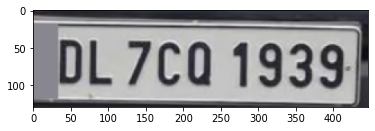

In [116]:
#Test Image
ab = cv2.imread('/content/Car1.png')
flag = False
for i in range(0:1):
  ab = cv2.imread('/content/drive/MyDrive/cars_dataset/1.png')
  ab.resize(3, 512, 512)
  ab = torch.from_numpy(ab)
  ab = ab.type(torch.FloatTensor)
  if ab1[0]>0.8:
    flag==True
    break;
    
if flag==False:
  print('Number Plate not found')
else:
  carplate_img_rgb = cv2.cvtColor(ab, cv2.COLOR_BGR2RGB)
  carplate_haar_cascade = cv2.CascadeClassifier('./haarcascade_russian_plate_number.xml')
  detected_carplate_img = carplate_detect(carplate_img_rgb)
  carplate_extract_img = carplate_extract(carplate_img_rgb)
  carplate_extract_img = enlarge_img(carplate_extract_img, 150)
  text = pytesseract.image_to_string(carplate_extract_img, lang="eng")
  plt.imshow(carplate_extract_img)
  text=text.replace(" ", "")
  text1=text[0:len(text)-3]
  text2=get_vehicle_info(text1)
  print(text2)

In [13]:
#HTML PAGE to Display Car Owner Information

contents = '''<!DOCTYPE html PUBLIC "-//W3C//DTD HTML 4.01 Transitional//EN">
<html>
<head>
  <meta content="text/html; charset=ISO-8859-1"
 http-equiv="content-type">
 <link rel='stylesheet' type='text/css' media='screen' href='style.css'>
  <title>Car Info</title>
</head>
<body>
    <div class="header">
        <h1>WEB PORTAL FOR CAR INFO</h1> 
        <h3>SUBMIT VIDEO OF CAR BELOW</h3>
    </div>
    
    <p id ="para">'''
content2='''</p>
    <div class="pos">
        <button id="btn">Close Tab</button>
    </div>

</body>
<script>
    var btn1 = document.getElementById("btn");
    btn1.onclick = function () {
        var conf = confirm("Are you sure, you want to close this tab?");
		if(conf == true){
			close();

		}
    }

</script>
</html>
'''

def main():
    browseLocal(contents+text2+content2)

def strToFile(text, filename):
    """Write a file with the given name and the given text."""
    output = open(filename,"w")
    output.write(text)
    output.close()

def browseLocal(webpageText, filename='tempBrowseLocal.html'):
    '''Start your webbrowser on a local file containing the text
    with given filename.'''
    import webbrowser, os.path
    strToFile(webpageText, filename)
    webbrowser.open("file:///" + os.path.abspath(filename)) 

main()